<a href="https://colab.research.google.com/github/sharlynmuturi/Pytorch-Tutorial/blob/main/Intro_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
# Create a model class that inherits nn.Module (nn is or neural network)
class Model(nn.Module):
  # Input layer (4 features of the flowers)
  # Hidden Layer1(H2) (no. of neurons)...> H2 (n).....> output (one of the three classes)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    # make an instance o nn.Module model
    super().__init__()
    # Now set up each layer, fc means fully connected, used for the first layers, out for output layer, specify the start to finish
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  # Create a func that moves everything forward layer to layer
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.out(x))

    return x

# Create a manual seed cause neural networks involve randomization
torch.manual_seed(41)

# create an instance o our model
model = Model()

In [72]:
# cretae a url to load data
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df['species'].unique()

my_df['species'] = my_df['species'].replace('setosa', 0)
my_df['species'] = my_df['species'].replace('versicolor', 1)
my_df['species'] = my_df['species'].replace('virginica', 2)

# Train-Test Split using scikitlearn, X or features, y is outcome, then convert to numpy arrays with .values

from sklearn.model_selection import train_test_split

X = my_df.drop('species', axis=1)
y = my_df['species']
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Convert the splits from numpy array to Float tensor Float bcos the eatures are decimals ie Floats, y are not
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

/tmp/ipython-input-1209017480.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2)


In [76]:
# Set the criterion o our model to measure the error
# ie how far of the prediction are from the data, choose an optimizer, set learning rate (i error doesnt go down after iterations, lower the lr, the lower the lr the longer the training)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training the model
# Epoch is one run via all the training data in the network, keep track of errors ie pred vs y train, detach turns from tensor to numpy
# print every ten epochs
# Do some back propagation ie take error rate of forward propgation and feed it back through the network t0 finetune the weights

epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch: {i} and Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and Loss: 1.1251550912857056
Epoch: 10 and Loss: 1.0096259117126465
Epoch: 20 and Loss: 0.8512223958969116
Epoch: 30 and Loss: 0.654869019985199
Epoch: 40 and Loss: 0.4490566551685333
Epoch: 50 and Loss: 0.2707386612892151
Epoch: 60 and Loss: 0.15461841225624084
Epoch: 70 and Loss: 0.09299226105213165
Epoch: 80 and Loss: 0.06447025388479233
Epoch: 90 and Loss: 0.050585027784109116


Text(0.5, 0, 'Epoch')

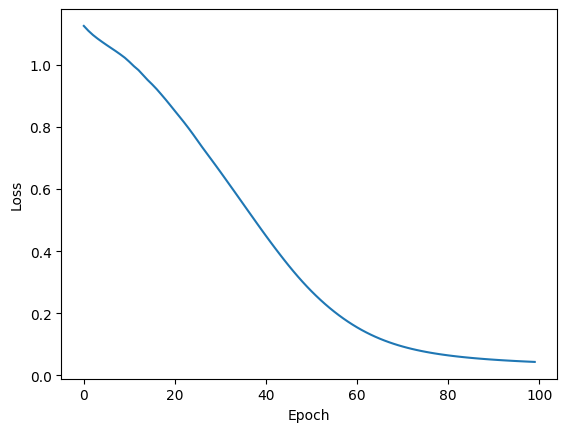

In [77]:
# graph, if not flatlining as desired change epoch or lr
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [78]:
# Validate our model on test set

with torch.no_grad():# Turn off back propagation  ie as we feed test data, no need to fiddle with weights
  y_eval = model.forward(X_test) # send in the test data and Evaluate, we defined the function forward in the model
  loss = criterion(y_eval, y_test) # find the loss error
  print(f'Loss: {loss}') # print to check against the last error in the criterion above, i not close, review how network did


Loss: 0.12955407798290253


In [89]:
correct = 0 # see how many we got correct
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = 'Setosa'
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'

    # networks prediction, turn rom tensor to str
    print(f'{i+1} {str(y_val)} \t y_test: {y_test[i]} \t {x} \t Actual: {y_val.argmax().item()}')

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
  print(f'Accuracy: {round(correct/len(y_test), 2)}')

print(f'Correct: {correct} \t Total: {len(y_test)}')

1 tensor([0.0000, 7.4818, 9.9517]) 	 y_test: 2 	 Virginica 	 Actual: 2
2 tensor([ 0.0000,  7.7416, 14.4150]) 	 y_test: 2 	 Virginica 	 Actual: 2
3 tensor([ 0.0000,  9.1741, 15.2260]) 	 y_test: 2 	 Virginica 	 Actual: 2
4 tensor([0.2420, 8.3711, 4.5725]) 	 y_test: 1 	 Versicolor 	 Actual: 1
5 tensor([ 0.0000,  8.4455, 12.5213]) 	 y_test: 2 	 Virginica 	 Actual: 2
6 tensor([1.6580, 8.0895, 2.0248]) 	 y_test: 1 	 Versicolor 	 Actual: 1
7 tensor([0.0000, 8.1067, 9.3146]) 	 y_test: 2 	 Virginica 	 Actual: 2
8 tensor([0.3616, 8.4538, 4.3424]) 	 y_test: 1 	 Versicolor 	 Actual: 1
9 tensor([ 0.0000,  8.2779, 10.8831]) 	 y_test: 2 	 Virginica 	 Actual: 2
10 tensor([ 0.0000,  8.2340, 15.2944]) 	 y_test: 2 	 Virginica 	 Actual: 2
11 tensor([0.0000, 8.0207, 8.7722]) 	 y_test: 2 	 Virginica 	 Actual: 2
12 tensor([9.0044, 3.5022, 0.0000]) 	 y_test: 0 	 Setosa 	 Actual: 0
13 tensor([8.0835, 3.2078, 0.0000]) 	 y_test: 0 	 Setosa 	 Actual: 0
14 tensor([2.2655, 6.5108, 0.4715]) 	 y_test: 1 	 Versicolor 

In [90]:
# Making predictions on new data, rem the highest number in the series the position is what it is

new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

with torch.no_grad():
  print(model.forward(new_iris))
  print(f'Prediction: {model.forward(new_iris).argmax().item()}')

In [92]:
# save the weights and biases for our model into a dict and save into google collab unit

torch.save(model.state_dict(), 'my_iris_model.pt')

# Load the saved NN model
# Load the model then load in all the weights and balances we just saved

new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

# Making predictions on new data, rem the highest number in the series the position is what it is

new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

with torch.no_grad():
  print(new_model.forward(new_iris))
  print(f'Prediction: {new_model.forward(new_iris).argmax().item()}')


<All keys matched successfully>

In [96]:
# Convolutional NN (CNN) Using mnist, classify images

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
# Transform data before importing it ie convert MNIST Image files into a tensor of 4 dimensions using the imported transforms
# The pictures are 2 dimensional but we need to be working in 4 dim ie use a tensor of 4 dimensions (to keep track of no. images, height, width, color channel)
# set up training and testing, the data has training and testing data so pull them in, save and download them into my google colab

transform = transforms.ToTensor()

train_data = datasets.MNIST(root='cnn_data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='cnn_data', train=False, download=True, transform=transform)


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.94MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 132kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.03MB/s]


In [120]:
# Define the CNN Model ie describe the convolutional data and what its doing, 2 convolutional layers
# Order is input(1 image), output(6 random choice for now)), kernel size(3 since 3 by 3 the filter we drag across to transform), stride (step length)
# for the second, input is the 6 we have in the 1st conv, output(16 random choice for now)
# Grab 1 mnist record (image),  Change the 2d image (28px by 28 px) into a 4d batch ie 1 batch, of 1 image of 28 by 28...
# # We took an image, put through a conv layer, then a pool layer, another conv,  then a second pool
# 1st conv shape.. torch.Size([1, 6, 26, 26]).. image, 6 filters we asked for the first conv, 26 by 26 is the image cause of padding doesn't really effect(rem was 28 by 28)
# pooling layer ... torch.Size([1, 6, 13, 13])...1 image, the 6 filters we chose, 26 pooled ie divided by 2 (kernel), and stride o 2
# Second conv layer.......... torch.Size([1, 16, 11, 11]) ........... 1 image, the 16 filters we chose, 11 or the 2 lost padding around the outside of the image
# Another pooling layer ....... torch.Size([1, 16, 5, 5]).........1 by 2 = 5.5 rounded down to 5 cause you cant invent data to round up

conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

for i, (X_train, y_train) in enumerate(train_data):
  break

x = X_train.view(1, 1, 28, 28)
x = F.relu(conv1(x))
x = F.max_pool2d(x, 2, 2)
x = F.relu(conv2(x))
x = F.max_pool2d(x, 2, 2)

torch.Size([1, 6, 26, 26])

In [125]:
# Building the model for CNN to go through all the images

# Create a small batch size for images like 10, shuffle training data
# define the parameters for the 2 conv layers
# define the parameters fully connected layers(input, output), 120 and 84 are just convectional, has to end with 10 cause we choose

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)


class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super ().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)

    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)

    X = X.view(-1, 16*5*5) # Flatten the data, - so we can vary the batch size
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)


# create an instance o our model
torch.manual_seed(41)
model = ConvolutionalNetwork()

# We need a loss unction optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [128]:
# Train and Test our CNN
import time
# track how long it takes for plotting
# create variables o what we want to track then for loop of epochs

start_time = time.time()
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  for b, (X_train, y_train) in enumerate(train_loader):
    b += 1

    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b % 600 == 0:
      print(f'Epoch: {i} \t Batch: {b} \t Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f'Total Training time: {total} seconds!')

Epoch: 0 	 Batch: 600 	 Loss: 0.1623610556125641
Epoch: 0 	 Batch: 1200 	 Loss: 0.1502392590045929
Epoch: 0 	 Batch: 1800 	 Loss: 0.4744560718536377
Epoch: 0 	 Batch: 2400 	 Loss: 0.14238706231117249
Epoch: 0 	 Batch: 3000 	 Loss: 0.007758188061416149
Epoch: 0 	 Batch: 3600 	 Loss: 0.3836284875869751
Epoch: 0 	 Batch: 4200 	 Loss: 0.0038223876617848873
Epoch: 0 	 Batch: 4800 	 Loss: 0.0021286322735249996
Epoch: 0 	 Batch: 5400 	 Loss: 0.0569545142352581
Epoch: 0 	 Batch: 6000 	 Loss: 0.00038789428072050214
Epoch: 1 	 Batch: 600 	 Loss: 0.005851339548826218
Epoch: 1 	 Batch: 1200 	 Loss: 0.3855525553226471
Epoch: 1 	 Batch: 1800 	 Loss: 0.004819948226213455
Epoch: 1 	 Batch: 2400 	 Loss: 0.003216963727027178
Epoch: 1 	 Batch: 3000 	 Loss: 0.0332382395863533
Epoch: 1 	 Batch: 3600 	 Loss: 0.5372857451438904
Epoch: 1 	 Batch: 4200 	 Loss: 0.04561494290828705
Epoch: 1 	 Batch: 4800 	 Loss: 0.0007510822033509612
Epoch: 1 	 Batch: 5400 	 Loss: 0.0001173773780465126
Epoch: 1 	 Batch: 6000 	 L

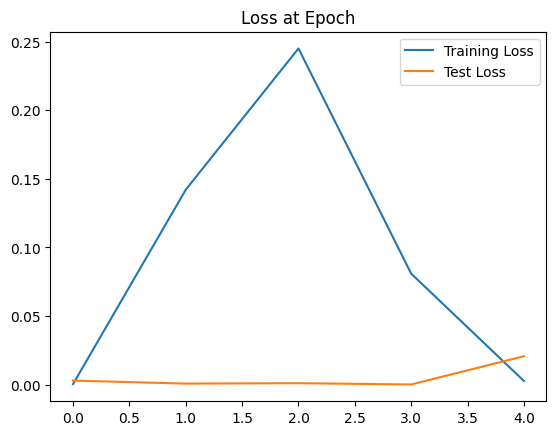

In [129]:
# Graphing out the loss at each epoch
train_losses = [t.detach().numpy() for t in train_losses]
train_correct = [t.detach().numpy() for t in train_correct]
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.title('Loss at Epoch')
plt.legend()

In [136]:
test_load = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
  correct = 0
  for b, (X_test, y_test) in enumerate(test_load):
    y_val = model(X_test)
    predicted = torch.max(y_val.data, 1)[1]
    correct += (predicted == y_test).sum()

  print(f'Test Accuracy: {correct.item()/len(test_data)}')

Test Accuracy: 0.9857


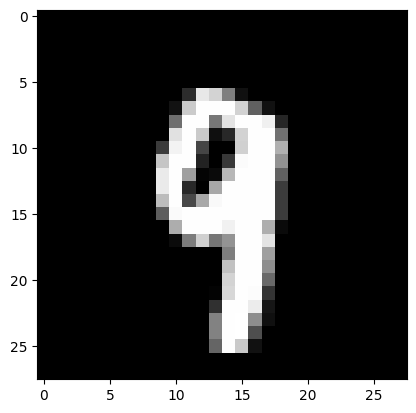

In [141]:
# Send an image through the model

new_data = test_data[4143] # tensor with an image in it

new_data[0].reshape(28,28)

plt.imshow(new_data[0].reshape(28,28), cmap='gray')

In [142]:
# pass the image through our model

model.eval()

with torch.no_grad():
  print(model(new_data[0].view(1,1,28,28))) # batch size o , 1 color channel, 28 by 28 height*width
  print(f'Prediction: {model(new_data[0].view(1,1,28,28)).argmax().item()}')

tensor([[-2.1693e+01, -1.8584e+01, -2.1709e+01, -1.5842e+01, -8.6330e+00,
         -1.8415e+01, -3.1769e+01, -1.2734e+01, -1.3396e+01, -1.8273e-04]])
Prediction: 9
